<a href="https://colab.research.google.com/github/AmritSDutta/colab_ml/blob/main/Ml_model_experimets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import time
from tqdm import tqdm

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import requests
import matplotlib.pyplot as plt
import numpy as np

In [10]:
city_spatial = gpd.read_file(r'city_spatial.csv')
print(city_spatial.columns)
city_spatial.head()

Index(['field_1', 'id', 'city', 'country', 'lat', 'lon', 'population',
       'elevation', 'geometry', 'proximity_to_coast_km',
       'proximity_to_freshwater_km', 'proximity_to_glacier_km'],
      dtype='object')


,field_1,id,city,country,lat,lon,population,elevation,geometry,proximity_to_coast_km,proximity_to_freshwater_km,proximity_to_glacier_km
0,0,1,Bombo,UGA,0.5833,32.5333,75000,1191.0,POINT (32.5333 0.5833),926.7780685420897,63.43062890564867,7669.969771931842
1,1,2,Fort Portal,UGA,0.671,30.275,42670,1517.0,POINT (30.275 0.671),1155.1143462899752,207.8861842073783,7688.633056299894
2,2,3,Potenza,ITA,40.642,15.799,69060,714.0,POINT (15.799 40.642),78.56226252073802,648.3363106982638,5421.587607284402
3,3,4,Campobasso,ITA,41.563,14.656,50762,768.0,POINT (14.656 41.563),66.93260942064187,658.3494009496502,5258.750499041271
4,4,5,Aosta,ITA,45.737,7.315,34062,575.0,POINT (7.315 45.737),207.88040818840935,275.35741813559787,4330.422574549758


In [11]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return

In [12]:
y = city_spatial.population

In [13]:
X = city_spatial[['lat', 'lon', 'elevation', 'proximity_to_coast_km', 'proximity_to_freshwater_km', 'proximity_to_glacier_km']]

X= X.to_numpy(dtype=np.float32)
y= y.to_numpy(dtype=np.float32)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, shuffle=True)

X_train[:10]
y_train[:10]

array([1352000.,  319941., 6461000.,   85700.,  125480.,  798000.,
        306180.,  527660.,   77207.,   59575.], dtype=float32)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train[:10]
y_train[:10]

array([1352000.,  319941., 6461000.,   85700.,  125480.,  798000.,
        306180.,  527660.,   77207.,   59575.], dtype=float32)

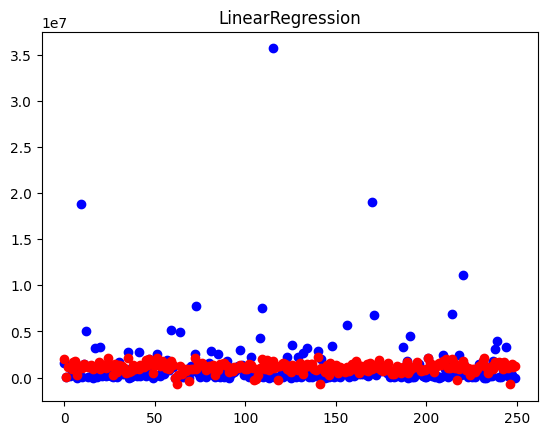

Mean absolute error: 1229498.62
Coefficient of determination: 0.04


In [17]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plotGraph(y_test, y_pred, 'LinearRegression')

print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

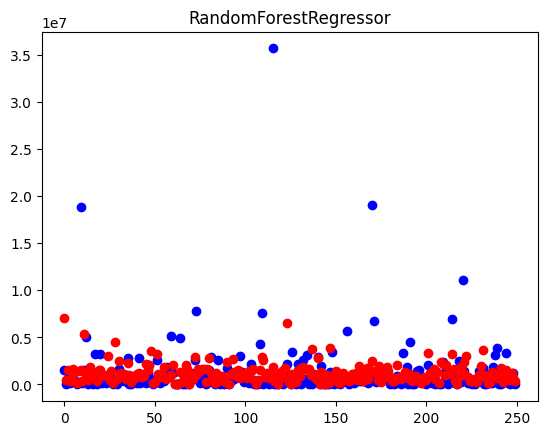

Mean absolute error: 1261337.32
Coefficient of determination: 0.02


In [19]:
model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plotGraph(y_test,y_pred, 'RandomForestRegressor')
print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
160 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

Best hyper parameter: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}


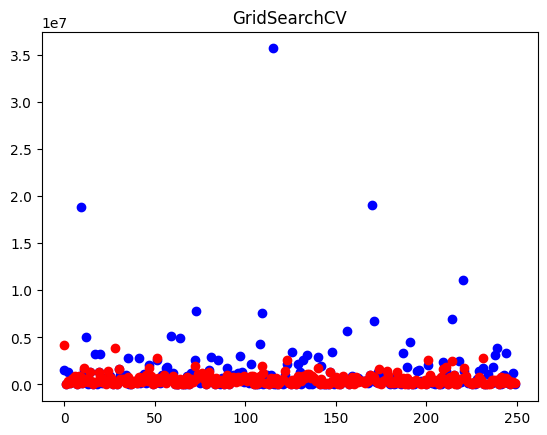

Mean absolute error: 993677.14
Coefficient of determination: -0.01


In [20]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()
k_fold_cv = 5
grid_params = {
 'n_estimators' : [10,25,50,100],
 'max_features' : ['auto', 'log2', 'sqrt'],
 'bootstrap' : [True, False],
  'max_depth' : [5,10,15,20]
 }

grid = GridSearchCV(model, param_grid=grid_params, cv=k_fold_cv, n_jobs = 1,
                    verbose = 0, return_train_score=True)
grid.fit(X_train, np.log1p(y_train))
print('Best hyper parameter:', grid.best_params_)

y_pred = grid.best_estimator_.predict(X_test)

plotGraph(y_test, np.expm1(y_pred), 'GridSearchCV')
print(f"Mean absolute error: {mean_absolute_error(y_test, np.expm1(y_pred)):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, np.expm1(y_pred)):.2f}")

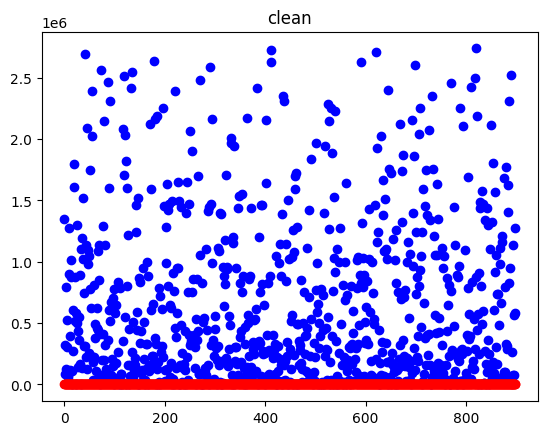

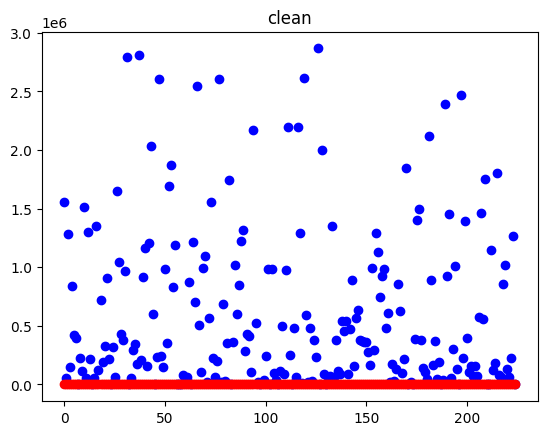

In [21]:
y_train_pred = grid.best_estimator_.predict(X_train)
residuals = np.abs(y_train - y_train_pred)

threshold = np.percentile(residuals, 90)
mask = residuals <= threshold
X_clean, y_clean, y_train_pred_clean = X_train[mask], y_train[mask], y_train_pred[mask]
plotGraph(y_clean, y_train_pred_clean, 'clean')

y_test_pred = grid.best_estimator_.predict(X_test)
residuals = np.abs(y_test - y_pred)
threshold = np.percentile(residuals, 90)
mask = residuals <= threshold
X_test_clean, y_test_clean, y_test_predict_clean = X_test[mask], y_test[mask], y_test_pred[mask]
plotGraph(y_test_clean, y_test_predict_clean, 'clean')

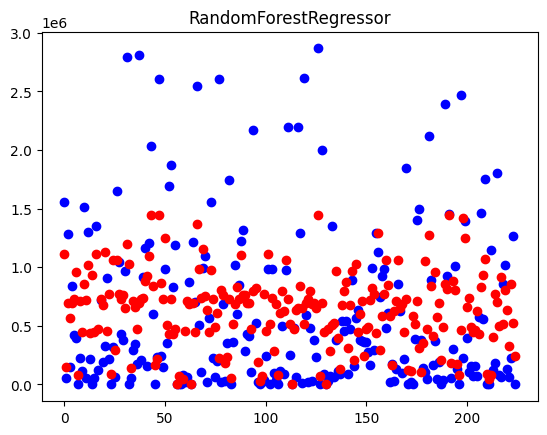

Mean absolute error: 448923.01
Coefficient of determination: 0.23


In [22]:
model = RandomForestRegressor(n_estimators=10,bootstrap =True, max_depth=5, random_state=42)

model.fit(X_clean, y_clean)
y_pred = model.predict(X_test_clean)

plotGraph(y_test_clean,y_pred, 'RandomForestRegressor')
print(f"Mean absolute error: {mean_absolute_error(y_test_clean, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test_clean, y_pred):.2f}")

In [23]:
y_test_clean[:10]

array([1.55300e+06, 5.23200e+04, 1.28400e+06, 1.46858e+05, 8.43000e+05,
       4.20585e+05, 3.97211e+05, 1.00000e+02, 2.25457e+05, 1.12927e+05],
      dtype=float32)

In [24]:
y_pred[:10]

array([1115817.53774631,  150728.18427841,  698534.03281797,
        563435.17932524,  691576.92209138,  732277.47167777,
        955704.59679736,   82981.7832478 ,  708066.78699525,
        447572.58468143])

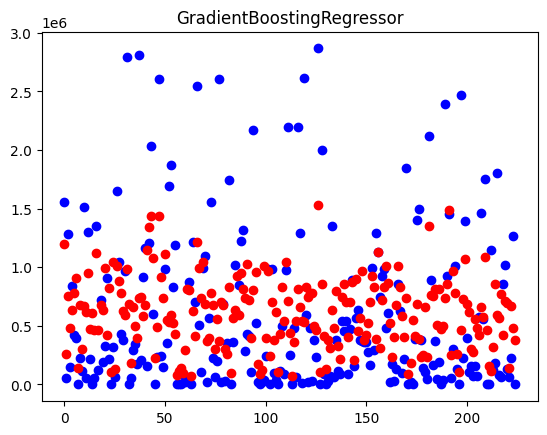

Mean absolute error: 440772.60
Coefficient of determination: 0.26


In [25]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=20, max_depth=5, random_state=42)

model.fit(X_clean, y_clean)
y_pred = model.predict(X_test_clean)

plotGraph(y_test_clean,y_pred, 'GradientBoostingRegressor')
print(f"Mean absolute error: {mean_absolute_error(y_test_clean, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test_clean, y_pred):.2f}")

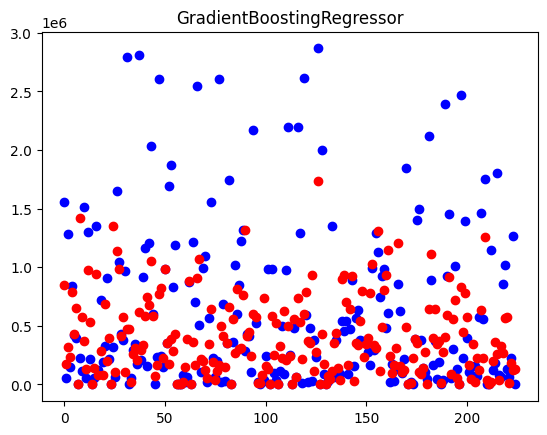

Mean absolute error: 409024.94
Coefficient of determination: 0.11


In [26]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=50, max_depth=5, random_state=42)

model.fit(X_clean, np.log1p(y_clean))
y_pred = model.predict(X_test_clean)

plotGraph(y_test_clean, np.expm1(y_pred), 'GradientBoostingRegressor')
print(f"Mean absolute error: {mean_absolute_error(y_test_clean, np.expm1(y_pred)):.2f}")
print(f"Coefficient of determination: {r2_score(y_test_clean, np.expm1(y_pred)):.2f}")


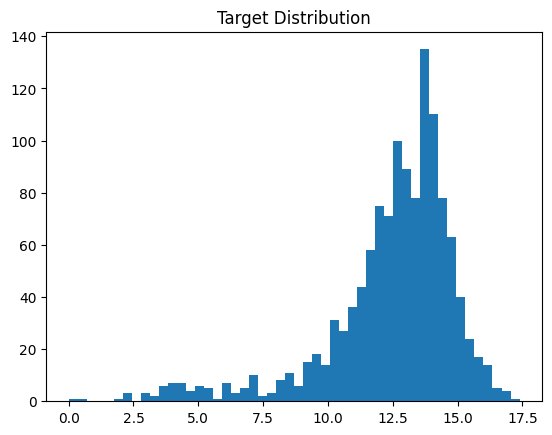

In [27]:
plt.hist(np.log1p(y), bins=50)
plt.title("Target Distribution")
plt.show()

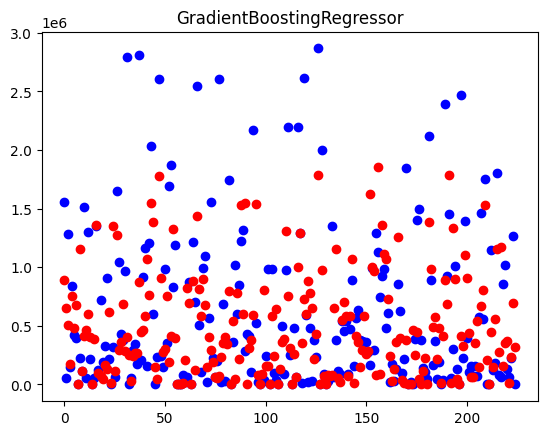

Mean absolute error: 415562.46
Coefficient of determination: 0.17


In [28]:
model = GradientBoostingRegressor(n_estimators=100, max_depth=15, random_state=42)

model.fit(X_clean, np.log1p(y_clean))
y_pred = model.predict(X_test_clean)

plotGraph(y_test_clean, np.expm1(y_pred), 'GradientBoostingRegressor')
print(f"Mean absolute error: {mean_absolute_error(y_test_clean, np.expm1(y_pred)):.2f}")
print(f"Coefficient of determination: {r2_score(y_test_clean, np.expm1(y_pred)):.2f}")

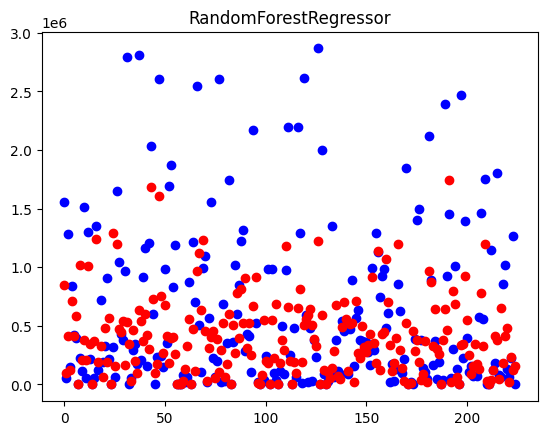

Mean absolute error: 389829.11
Coefficient of determination: 0.18


In [29]:
model = RandomForestRegressor(n_estimators=100,bootstrap =True, max_depth=20, random_state=42)

model.fit(X_clean, np.log1p(y_clean))
y_pred = model.predict(X_test_clean)

plotGraph(y_test_clean,np.expm1(y_pred), 'RandomForestRegressor')
print(f"Mean absolute error: {mean_absolute_error(y_test_clean, np.expm1(y_pred)):.2f}")
print(f"Coefficient of determination: {r2_score(y_test_clean, np.expm1(y_pred)):.2f}")

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


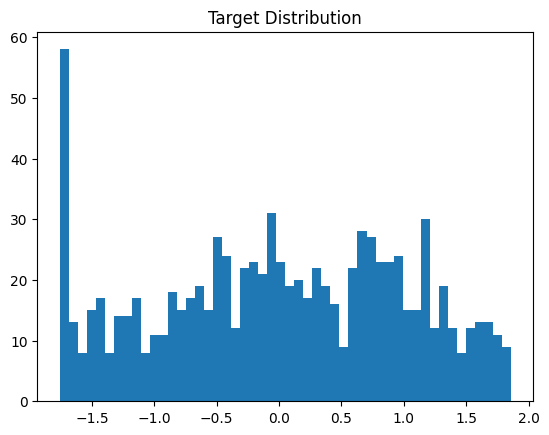

In [30]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')  # or method='box-cox' if y > 0 only
y_clean_scaled = y_clean / 10000
y_trans = pt.fit_transform(y_clean_scaled.reshape(-1, 1))  #.flatten()


plt.hist(y_trans, bins=50)
plt.title("Target Distribution")
plt.show()



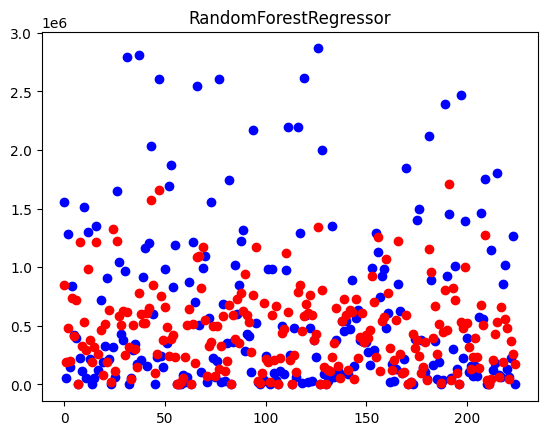

Mean absolute error: 392493.89
Coefficient of determination: 0.24


In [31]:
# Train model on transformed target
model.fit(X_clean, y_trans.ravel())
preds_trans = model.predict(X_test_clean)

# Inverse transform predictions back
preds_original = pt.inverse_transform(preds_trans.reshape(-1, 1)).flatten()
preds_original = preds_original * 10000

plotGraph(y_test_clean,preds_original, 'RandomForestRegressor')
print(f"Mean absolute error: {mean_absolute_error(y_test_clean, preds_original):.2f}")
print(f"Coefficient of determination: {r2_score(y_test_clean, preds_original):.2f}")

In [32]:
import shap
explainer_model = shap.Explainer(model)

X_df = pd.DataFrame(X_clean, columns=['lat', 'lon', 'elevation', 'proximity_to_coast_km', 'proximity_to_freshwater_km', 'proximity_to_glacier_km'])
shap_values = explainer_model(X_df)



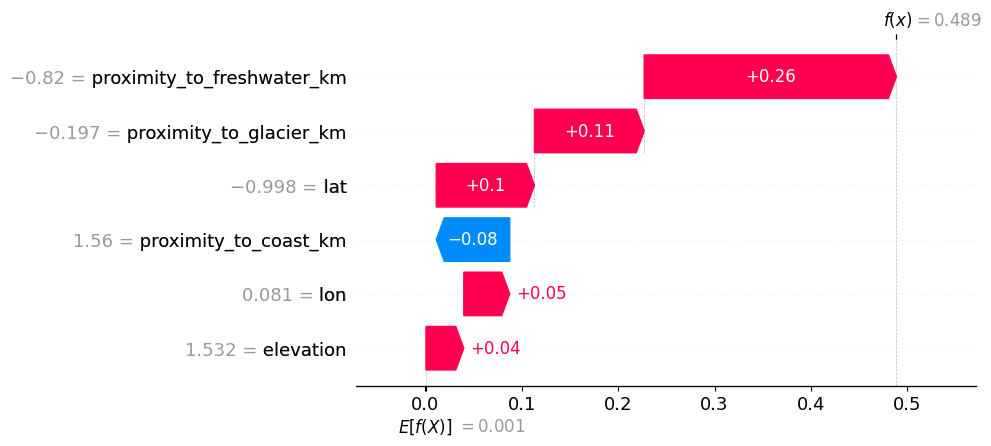

In [33]:
shap.plots.waterfall(shap_values[0])